# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»).Построим модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — мы её уже сделали.

Построим модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверим *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tqdm import tqdm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


## Разбейте данные на выборки

In [3]:
#df_train, df_valid = train_test_split(df, test_size=0.4, random_state=12345)
#df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=12345)

In [4]:
x = df.loc[:,~df.columns.isin(["is_ultra"])]
y = df["is_ultra"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size = 0.4,
                                                    random_state = 12345,
                                                    stratify=y)

In [6]:
x_valid, x_test, y_valid, y_test = train_test_split(x_test,
                                                    y_test,
                                                    test_size = 0.5,
                                                    random_state = 12345,
                                                    stratify=y_test)

In [7]:
#x_train = df_train.drop('is_ultra', axis=1)
#y_train = df_train['is_ultra']

#x_valid = df_valid.drop('is_ultra', axis=1)
#y_valid = df_valid['is_ultra']

#x_test = df_test.drop('is_ultra', axis=1)
#y_test = df_test['is_ultra']

In [8]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(1928, 4)
(643, 4)
(643, 4)


## Исследуйте модели

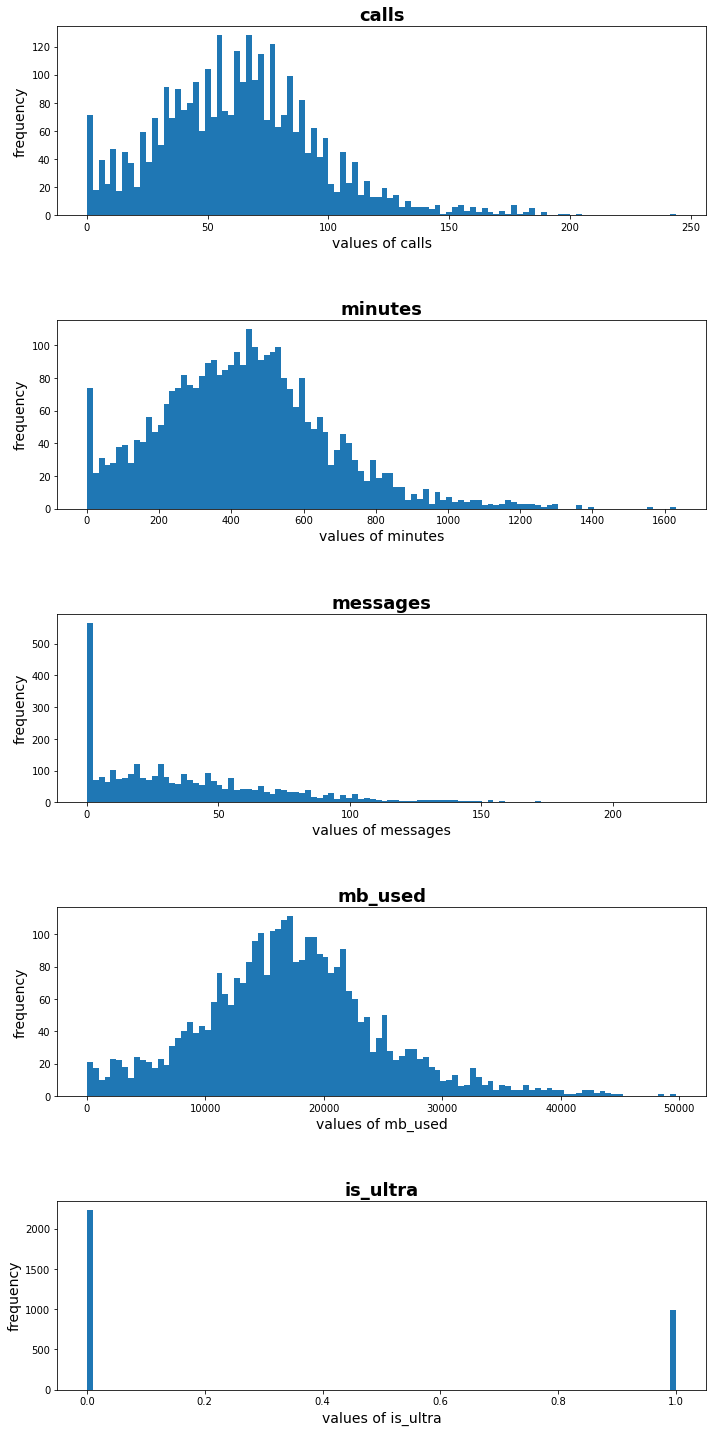

In [9]:
fig, subplots = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))

columns = df.columns
i = -1
for ax in fig.axes:
    i += 1
    ax.hist(df[columns[i]], bins=100)
    
    ax.set_title(columns[i], fontsize=18, fontweight="bold")
    ax.set_xlabel('values of ' + columns[i], fontsize=14)
    ax.set_ylabel('frequency', fontsize=14)
    
plt.tight_layout(h_pad = 5)

plt.show()

Как видно из графиков в столбцах "calls", "minutes" и "messages" довольно много нулевых значений.

Посмотрим на данные в нулевыми значениями в столбцах "calls", "minutes" и "messages"

In [10]:
df[df['minutes'] == 0]

,calls,minutes,messages,mb_used,is_ultra
54,0.0,0.0,33.0,14010.33,1
247,0.0,0.0,35.0,16444.99,1
264,0.0,0.0,21.0,19559.55,0
351,0.0,0.0,8.0,35525.61,1
390,0.0,0.0,25.0,19088.67,1
484,0.0,0.0,191.0,32448.02,1
551,0.0,0.0,24.0,18701.54,1
647,0.0,0.0,30.0,10236.20,1
769,0.0,0.0,32.0,17206.44,0
884,0.0,0.0,180.0,32045.73,1


Как мы видим на таблице, в столбцах calls, minutes скорее всего были пропуски и их заменили на 0. В случае с messages, видно что очень мало сообщений, т.к. в наши дни практически все пишут в мессенджерах, а это не messages. messages это SMS. 

В столбце is_ultra можно заметить, что данные количественно распределены неравномерно между тарифами. Т.е. данных по тарифу Смарт более чем в 2 раза больше чем данных Ультра. Это не очень хорошо, т.к. при разбиении датасета на выборки мы можем получить, например, очень малое количество данных Ультра в обучающей выборке и модель плохо обучится.

Выделим признаки в отдельный датасет, построим график матрицы рассеяния и вычислим коэффициент корреляции между признаками.

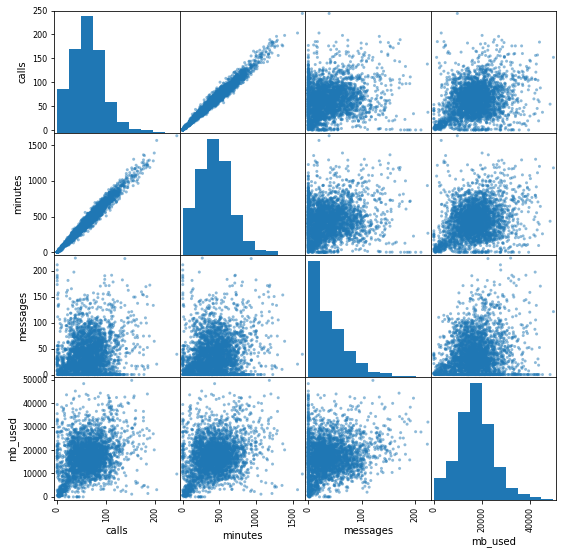

In [11]:
df_features = df.copy()

del df_features['is_ultra']

pd.plotting.scatter_matrix(df_features, figsize=(9, 9))

plt.show()

In [12]:
round(df_features.corr(), 2).style.background_gradient('coolwarm')

,calls,minutes,messages,mb_used
calls,1.000000,0.980000,0.180000,0.290000
minutes,0.980000,1.000000,0.170000,0.280000
messages,0.180000,0.170000,1.000000,0.200000
mb_used,0.290000,0.280000,0.200000,1.000000


По графику наблюдается сильная прямая взаимосвязь между количеством совершенных звонков и количеством использованных минут, коэффициент корреляции 0,98. Это логично.

Исследуем модель DecisionTreeClassifier

In [13]:
#for i in range(1, 5):
#    dectree_model = DecisionTreeClassifier(max_depth=i, random_state=12345)
#    dectree_model.fit(feature_train, target_train)
    
#    dectree_valid_predictions = dectree_model.predict(feature_valid)
#    accuracy = accuracy_score(target_valid, dectree_valid_predictions)
#    print(f"DecisionTreeClassifier. max_depth = {i}; accuracy = {accuracy}")

In [14]:
best_dtc = None
best_accuracy_dtc = 0
best_depth_dtc = 0
for depth in tqdm(range(2,50)):
    dtc = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    dtc.fit(x_train, y_train)
    prediction_valid_dtc = dtc.predict(x_valid)
    accuracy_dtc = accuracy_score(prediction_valid_dtc, y_valid)
    if best_accuracy_dtc < accuracy_dtc:
        best_dtc = dtc
        best_accuracy_dtc = accuracy_dtc
        best_depth_dtc = depth

100%|██████████| 48/48 [00:00<00:00, 95.02it/s] 


Исследуем модель RandomForestClassifier

In [15]:
#for i in range(1, 21):
#    randforest_model = RandomForestClassifier(random_state=12345, n_estimators=i)
#    randforest_model.fit(feature_train, target_train)
#    randforest_valid_predictions = randforest_model.predict(feature_valid)
#    score = accuracy_score(target_valid, randforest_valid_predictions)
#    print(f'RandomForestClassifier, estimators={i}, score={score}')

In [16]:
best_rfc = None
best_accuracy_rfc = 0
best_est_rfc = 0
best_depth_rfc = 0
for est in tqdm(range(2,51)):
    for depth in range(2,25):
        rfc = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        rfc.fit(x_train, y_train)
        prediction_valid_rfc = rfc.predict(x_valid)
        accuracy_rfc = accuracy_score(prediction_valid_rfc, y_valid)
        if best_accuracy_rfc < accuracy_rfc:
            best_rfc = rfc
            best_depth_rfc = depth
            best_est_rfc = est
            best_accuracy_rfc = accuracy_rfc

100%|██████████| 49/49 [01:44<00:00,  2.12s/it]


Исследуем модель LogisticRegression

In [17]:
#logregr_model = LogisticRegression(random_state=12345)
#logregr_model.fit(feature_train, target_train)
#logregr_predictions = logregr_model.predict(feature_valid)
#score = accuracy_score(target_valid, logregr_predictions)
#print('LogisticRegression:', score)

In [18]:
lr = LogisticRegression(random_state=12345)
lr.fit(x_train,y_train)
prediction_valid_lr = lr.predict(x_valid)
accuracy_lr = accuracy_score(prediction_valid_lr, y_valid)

Сравним все модели. 

In [19]:
print(f"DecisionTreeClassifier: {best_accuracy_dtc}")
print(f"RandomForestClassifier: {best_accuracy_rfc}")
print(f"LogisticRegression: {accuracy_lr}")

DecisionTreeClassifier: 0.80248833592535
RandomForestClassifier: 0.8227060653188181
LogisticRegression: 0.7387247278382582


<b>Вывод:</b>
Как мы видим, из всех моделей самый высокий показатель точности только у модели RandomForestClassifier. Эту модель мы и используем на тестовой выборке.

## Проверьте модель на тестовой выборке

In [49]:
rfc_test = RandomForestClassifier(random_state=12345,
                                 n_estimators=15,
                                 max_depth=10,
                                )

rfc_test.fit(x_train, y_train)
predictions_rfc_test = rfc_test.predict(x_test)

rf_test = round(accuracy_score(y_test, predictions_rfc_test), 4)
print('accuracy:', rf_test)

accuracy: 0.8103


81% правильных ответов. В валидном наборе конечно чуть больше, 82%. 

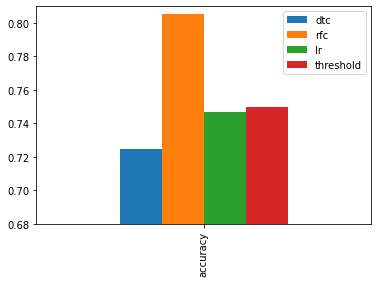

In [50]:
dtc.score(x_test, y_test)
rfc.score(x_test, y_test)
lr.score(x_test, y_test)
pd.DataFrame({'dtc': [dtc.score(x_test, y_test)],\
              'rfc': [rfc.score(x_test, y_test)],\
              'lr': [lr.score(x_test, y_test)],\
              'threshold' :[0.75]
             }, index=['accuracy']).plot.bar(ylim=(.68,.81));

Наиболее адекватные предсказания делает Random Forest, это видно по точности предсказания на валидационной и на тестовой выборке.

## (бонус) Проверьте модели на адекватность

In [ ]:
df['is_ultra'].value_counts(normalize=True)

accuracy модели, использующей случайное предсказание тарифа составляет 0.69, а у нашей модели составляет 0.79, что говорит о том, что она адекватней случайного угадывания.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
